### **Data Cleaning**



In [ ]:
#installing all relevant packages
!pip install pyspellchecker
!apt install build-essential libpoppler-cpp-dev pkg-config python3-dev
!pip install pdftotext
!pip install -U nltk

     |████████████████████████████████| 1.9MB 2.7MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
pkg-config is already the newest version (0.29.1-0ubuntu2).
python3-dev is already the newest version (3.6.7-1~18.04).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libpoppler-cpp0v5 libpoppler-dev
The following NEW packages will be installed:
  libpoppler-cpp-dev libpoppler-cpp0v5 libpoppler-dev
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 41.3 kB of archives.
After this operation, 233 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libpoppler-cpp0v5 amd64 0.62.0-2ubuntu2.10 [28.0 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd6

In [ ]:
#connecting to google drive
from google.colab import drive
drive.mount('/gdrive')

In [ ]:
%cd /path
!ls

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
#importing relevant libraries
import string
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from spellchecker import SpellChecker
from nltk.corpus import stopwords
import pdftotext

In [ ]:
#converting the pdf files to text for further analysis
with open('The Man from Bashmour: A Modern Arabic Novel (Modern Arabic Literature (Hardcover), 2007.pdf', "rb") as f:
    pdf = pdftotext.PDF(f)
 
# Save all text to a txt file.
with open('The Man from Bashmour: A Modern Arabic Novel (Modern Arabic Literature (Hardcover), 2007.txt', 'w') as f:
    f.write("\n\n".join(pdf))

with open('The Man from Bashmour: A Modern Arabic Novel (Modern Arabic Literature (Hardcover), 2007.txt') as f:
    lines = [line.strip('\n') for line in f]
    for num, line in enumerate(lines):
        if line.endswith('-'):
            # the end of the word is at the start of next line
            end = lines[num+1].split()[0]
            # we remove the - and append the end of the word
            lines[num] = line[:-1] + end
            # and remove the end of the word and possibly the 
            # following space from the next line
            lines[num+1] = lines[num+1][len(end)+1:]

    text = '\n'.join(lines)

with open('The Man from Bashmour: A Modern Arabic Novel (Modern Arabic Literature (Hardcover), 2007.txt', "w") as f:
    f.write(text)

In [ ]:
# load text
filename = 'Children of the New World _ Alexander Street, a ProQuest Company.txt'
file = open(filename,'rb') 
text = file.read().decode('utf-8')
file.close()


In [ ]:
# sentence and word tokenization
def data_clean(data):
  # splitting into sentences
  sentences = sent_tokenize(data)
  sentences = sentences[16:] #select based on the occurance which remove the title and any other irrelevant text

  # detokenizing to combine the text again
  final_text = TreebankWordDetokenizer().detokenize(sentences)

  # split into words
  tokens = word_tokenize(final_text)

  # convert to lower case
  words = [word.lower() for word in tokens]

  # remove all tokens that are not alphabetic
  word_punct = [word for word in words if word.isalpha()]

  #remove stopwords
  stop_words = stopwords.words('english')
  word_stop = [w for w in word_punct if not w in stop_words]

  #instantiating lemmatizer
  lemmatizer = WordNetLemmatizer()
  lemmatized = [lemmatizer.lemmatize(word) for word in word_stop]

  spell = SpellChecker(case_sensitive=False)
  spell_check = [spell.correction(word) for word in lemmatized]

  final_data = [word for word in spell_check if len(word) > 3]

  rmv_words = ['downloaded','content','aug','wed','etc','chapter','ttp','said','know','ofthe']
  data_fin = [w for w in final_data if not w in rmv_words]

  return ' '.join(data_fin)

In [ ]:
data_f = data_clean(text)

### **Word Cloud**

In [ ]:
 !pip install wordcloud

In [ ]:
#Loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(230,100%%, %d%%)" % np.random.randint(10,30))

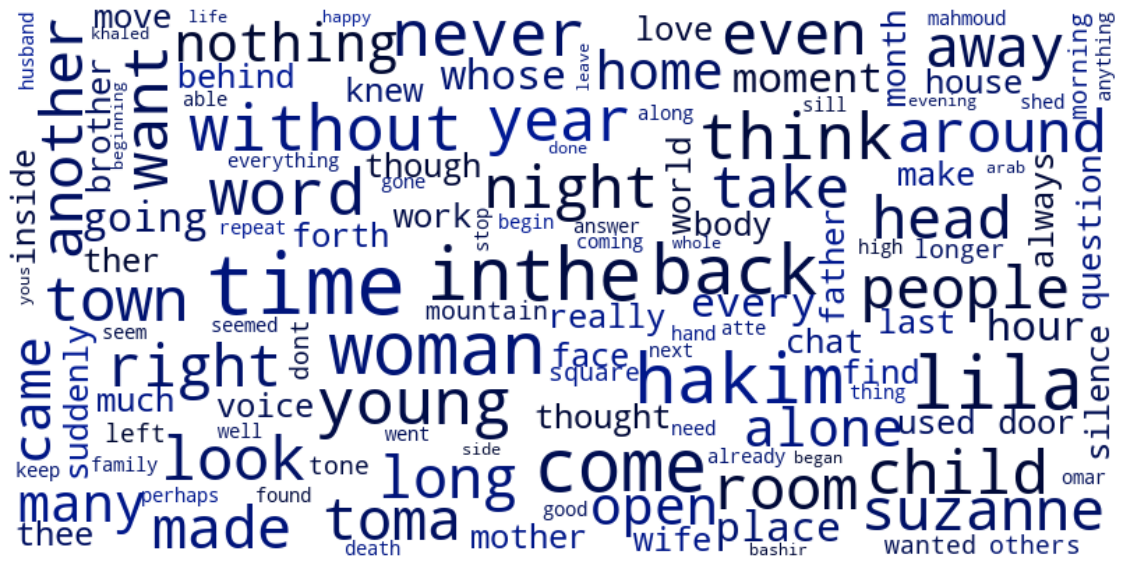

In [ ]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=30, min_font_size=6, max_words=10000,random_state=10,scale=2,
                      background_color="white",contour_width=3).generate(data_f)
wordcloud.recolor(color_func = grey_color_func)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

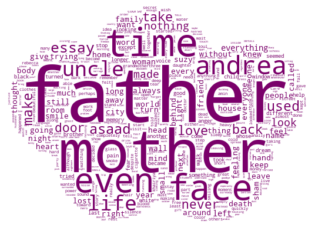

In [ ]:
# mask = np.array(Image.open('mask-cloud.png'))
# wc = WordCloud(stopwords=STOPWORDS, 
#                mask=mask, background_color="white",
#                max_words = 5000, max_font_size=256,
#                random_state=42, width=mask.shape[1],
#                height=mask.shape[0],color_func=one_color_func).generate(data_f)
# plt.imshow(wc, interpolation="bilinear")
# plt.axis('off')
# plt.show()